# Customer Churn Model

**Author** Adriana Ramirez Franco.\
**Email:** aramirezfr20@gmail.com

# 1. Business Understanding

## Introduction

**Real-World Problem**

SyriaTel faces a high churn rate, with many customers leaving for competitors, impacting revenue and market share. To address this, SyriaTel aims to develop a customer churn prediction model to identify factors contributing to churn, reduce churn rates, increase retention, and improve profitability.


### Objectives

1. **Identify Churn Factors**: Determine key factors contributing to customer churn.
2. **Predict Churn Risk**: Develop a model to identify at-risk customers accurately.
3. **Proactive Retention Strategies**: Enable SyriaTel to implement measures to retain at-risk customers.

### Success Metrics

1. **Model Accuracy**: Achieve a high recall score of 0.8 in the churn prediction model.
2. **Feature Identification**: Identify significant factors contributing to churn.
3. **Actionable Insights**: Provide recommendations to reduce churn and improve retention.
4. **Demonstrated Value**: Show the effectiveness of churn prediction models in retention strategies and reducing revenue loss.

# 2. Data Understanding

In [1]:
#import necessary modules

#data manipulation
import pandas as pd
import numpy as np

#for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#modeling
import scipy as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, recall_score, roc_curve, roc_auc_score

#algorithms
from sklearn.linear_model import LogisticRegression

In [2]:
#importing necessary data set
df=pd.read_csv("./Data/SyriaTelData.csv.xls")

In [3]:
#creating a copy of the dataset
data=df.copy()

In [4]:
#Checking the first 5 rows of the dataset
data.head(5)

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


- The dataset contains 3,333 rows of data and 20 columns.
- There's no missing data in any of the columns.

In [5]:
#Getting general information of the data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [6]:
#Identifying numerical and categorical columns
#numerical columns
print(f"Numerical Columns: {data.select_dtypes(include='number').columns}\n")

#categorical columns
print(f"Categorical Columns: {data.select_dtypes(include='object').columns}\n")

Numerical Columns: Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

Categorical Columns: Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')



# 3. Data Preparation

## 3.1 Data Cleaning

The first step to prepare my data is to looking out for missing and duplicate values in the data set.

### 3.1.1 Missing Values

In [7]:
#checking for missing values
data.isna().sum().sort_values(ascending=False)

churn                     0
total day charge          0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total eve minutes         0
customer service calls    0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
state                     0
dtype: int64

No missing values found.

### 3.1.2 Duplicates

In [8]:
#checking for duplicates
data.duplicated().sum()

0

No duplicates found.

### 3.1.3 Filtering Columns

When using this data set we will only make use of the necessary columns for the model.

In [9]:
#dropping unnecessary columns for this project
data=data.drop(columns=['area code', 'phone number', 'state', 'account length', 'number vmail messages'])

There are three columns with information on charges a customer spends based on the time of the day: day, eve and night. 

A new column will be created that will add the three charges of the different times of the day.

In [10]:
#Creating the column 'total charges' which adds 3 columns
data['total charges']=data[['total day charge', 'total eve charge', 'total night charge']].sum(axis=1)
data['total charges'].head(5)

0    72.86
1    55.54
2    59.00
3    65.02
4    49.36
Name: total charges, dtype: float64

## 3.2 Exploratory Data Analysis

### 3.2.1 Target Column

Checking for normalized distribution of the target variable.

In [11]:
#starting to check the target column 'churn'
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [12]:
data['churn'].value_counts(normalize=True)

False    0.855086
True     0.144914
Name: churn, dtype: float64

In the target column 'churn' we can see two values: 
- 85.5%(2,850) customers did not churn
- 14.5% (483) customers that churned.

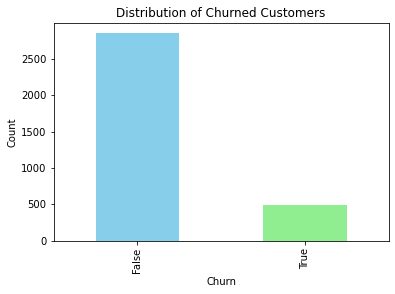

In [13]:
#bar plot of the values of the 'churn' column
#count of the values in the churn column
ax=data['churn'].value_counts().plot(kind='bar', color=['skyblue', 'lightgreen'])

#setting x and y label
plt.title('Distribution of Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')

#save the plot
plt.savefig('./Graphs/distribution_churns.png', dpi=150)

plt.show()

- Retained customers: 85.5%
- Customers that terminated their contract: 14.5%

The distribution of the target column shows a severe data imbalance.

### 3.2.2 Exploring Numerical Columns

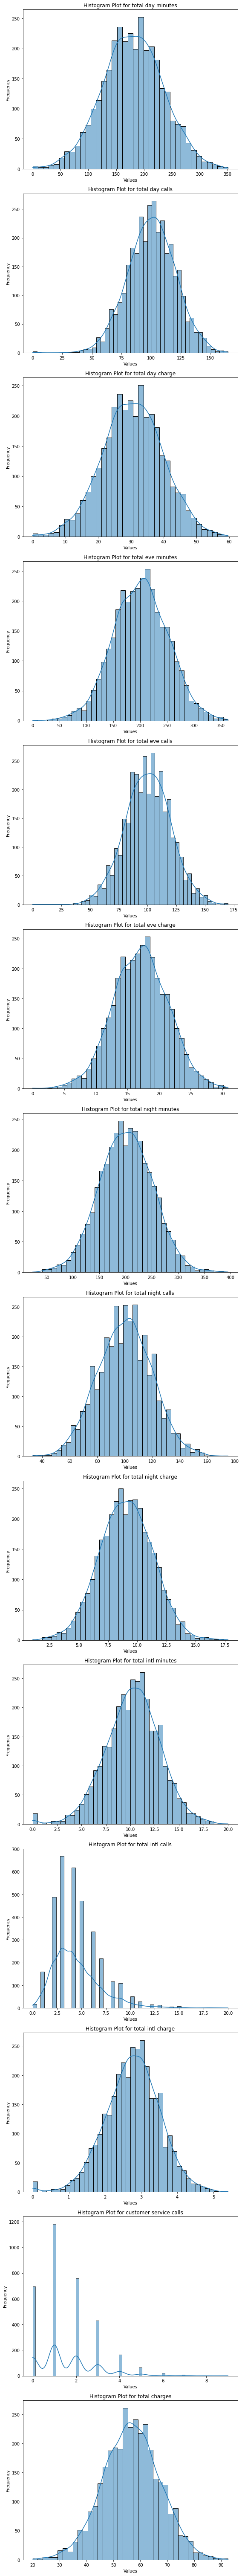

In [14]:
#number of numerical columns
num_columns=data.select_dtypes(include=['int64', 'float64']).columns

#calculate number of rows and columns for subplots
num_rows=len(num_columns)
num_cols=1

#create subplots
fig, axes=plt.subplots(num_rows, num_cols, figsize=(8, 6*num_rows))

#iterate over each column and plot:
for i, column in enumerate(num_columns):
    sns.histplot(data=data, x=column, kde=True, ax=axes[i])
    axes[i].set_xlabel('Values')
    axes[i].set_ylabel('Frequency')
    axes[i].set_title(f'Histogram Plot for {column}')
    
#adjust spacing between subplots
plt.tight_layout()

#save plots
fig.savefig('./Graphs/Distribution_NumCols.png', dpi=150)

#show
plt.show()

- After checking the distribution plots of the numerical columns, the column 'customer service calls' is not normally distributed.
- The distribution plot for 'total international calls' has a right skewed distribution. This could imply that customer who make international calls usually make about 1 to 7 calls during their monthly plan, instead of a normal range from 0 to 20.

### 3.2.3 Exploring Categorical Columns

The two Categorical Columns in the dataset are 'international plan' and 'voice mail plan'.

In [15]:
#Checking the categorical features
cat_columns=data.select_dtypes(include=[object])
cat_columns.head()

,international plan,voice mail plan
0,no,yes
1,no,yes
2,no,no
3,yes,no
4,yes,no


From the 'voice mail plan' column we can conclude that:
- 72.34% (2,411) of customers do not have a voice mail plan.
- 27.66% (922) of customers have a voice mail plan.

In [16]:
#Count of the values in the 'voice mail plan' column.
cat_columns['voice mail plan'].value_counts()

no     2411
yes     922
Name: voice mail plan, dtype: int64

In [17]:
cat_columns['voice mail plan'].value_counts(normalize=True)

no     0.723372
yes    0.276628
Name: voice mail plan, dtype: float64

From the 'international plan' column we can conclude that:
- 90.31% (3,010) of customers do not have the international plan.
- 9.69% (323) of customers have the international plan.


- The column *'international_plan'*: which shows if the customer signed up for an international plan or not.

In [18]:
cat_columns['international plan'].value_counts()

no     3010
yes     323
Name: international plan, dtype: int64

In [19]:
cat_columns['international plan'].value_counts(normalize=True)

no     0.90309
yes    0.09691
Name: international plan, dtype: float64

The majority of customers that churned did not have a voice mail plan.

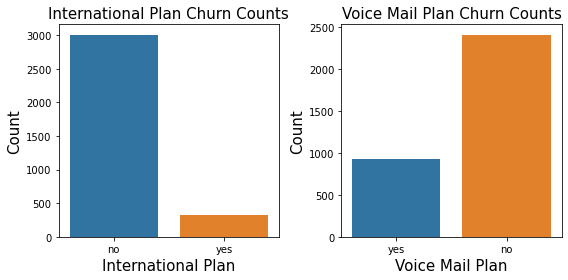

In [20]:
#create the subplots and set the figure size
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

#plot the first subplot
sns.countplot(x=data['international plan'], ax=axs[0])
axs[0].set_title('International Plan Churn Counts', fontsize=15)
axs[0].set_xlabel('International Plan', fontsize=15)
axs[0].set_ylabel('Count', fontsize=15)

#plot the second subplot
sns.countplot(x=data['voice mail plan'], ax=axs[1])
axs[1].set_title('Voice Mail Plan Churn Counts', fontsize=15)
axs[1].set_xlabel('Voice Mail Plan', fontsize=15)
axs[1].set_ylabel('Count', fontsize=15)


plt.tight_layout()

#save the plot
plt.savefig('./Graphs/histogram_CatCols.png', dpi=150)

plt.show()

Majority of customers with 'International Plan' did not churn.

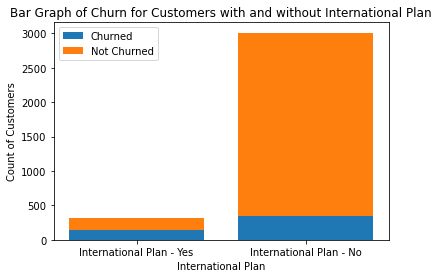

In [21]:
#subset the dataset based on 'international plan'
has_international_plan = data[data['international plan'] == 'yes']
no_international_plan = data[data['international plan'] == 'no']

#count the number of customers who churned and didn't churn for each group
has_international_plan_churned = has_international_plan[has_international_plan['churn'] == True]['churn'].count()
has_international_plan_not_churned = has_international_plan[has_international_plan['churn'] == False]['churn'].count()

no_international_plan_churned = no_international_plan[no_international_plan['churn'] == True]['churn'].count()
no_international_plan_not_churned = no_international_plan[no_international_plan['churn'] == False]['churn'].count()

#create a bar graph
churned = [has_international_plan_churned, no_international_plan_churned]
not_churned = [has_international_plan_not_churned, no_international_plan_not_churned]

labels = ['International Plan - Yes', 'International Plan - No']
x = range(len(labels))

plt.bar(x, churned, label='Churned')
plt.bar(x, not_churned, bottom=churned, label='Not Churned')

plt.xlabel('International Plan')
plt.ylabel('Count of Customers')
plt.title('Bar Graph of Churn for Customers with and without International Plan')
plt.xticks(x, labels)

plt.legend()

#save the plot
plt.savefig('./Graphs/bargraph_IntPlan.png', dpi=150)

plt.show()

Bivariative Analysis:
I will explore the relationship between variables in the data set.

The majority of customers who churned were called by customer service from 4 times to 9 times.

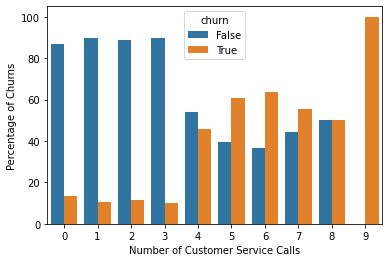

In [22]:
#grouping the data by 'customer service calls' and 'churn', and calculate the percentages
grouped_data = data.groupby('customer service calls')['churn'].value_counts(normalize=True).unstack() * 100

#reset the index to have 'customer service calls' as a column
grouped_data = grouped_data.reset_index()

#melt the dataframe to have 'customer service calls' and 'churn' as categorical variables
melted_data = pd.melt(grouped_data, id_vars='customer service calls', var_name='churn', value_name='Percentage')

#plotting the bar graph using Seaborn
sns.barplot(data=melted_data, x='customer service calls', y='Percentage', hue='churn')

plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Percentage of Churns')
plt.title('Customer Churn based on Customer Service Calls')

#save the plot
plt.savefig('./Graphs/histogram_CSCalls.png', dpi=150)

plt.show()

***********
Customers who terminated their contracts had higher charges than the customers who kept their contracts with a smaller phone bill. This situation suggests that customers are not content having high paying phone bills.
- Customers who terminated their contract were paying from approximately 65 to 90 dollars per month.

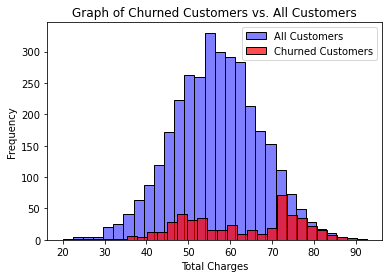

In [23]:
#separate churned and customers
churn_customers = data[data['churn'] == True]
all_customers = data

#create a histogram for all customers
sns.histplot(all_customers['total charges'], bins=30, color='blue', alpha=0.5, label='All Customers')

#create a histogram for churned customers
sns.histplot(churn_customers['total charges'], bins=30, color='red', alpha=0.7, label='Churned Customers')


plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.title('Graph of Churned Customers vs. All Customers')

plt.legend()

#save the plot
plt.savefig('./Graphs/distribution_charges_churns.png', dpi=150)

plt.show()

### 3.2.4 Correlation Check

Using Pearsons Correlation Matrix to identify columns that have high correlation with the target column.

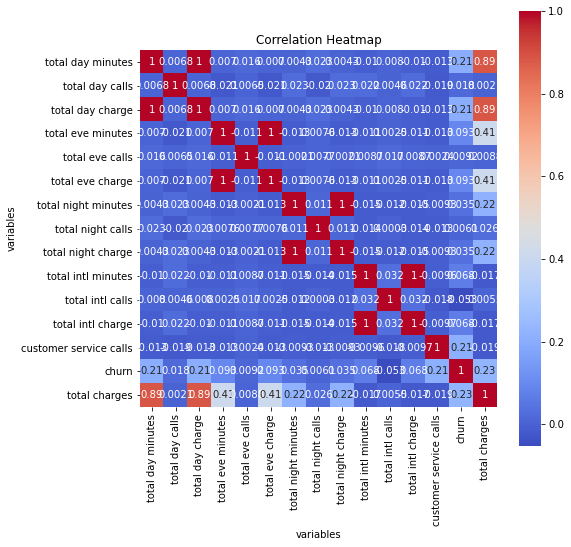

In [24]:
#calculating the correlation matrix of the data set
correlation_matrix=data.corr()

fig, ax=plt.subplots(figsize=(8,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
 
plt.title('Correlation Heatmap')
plt.xlabel('variables')
plt.ylabel('variables')

#save the plot
plt.savefig('./Graphs/first_heatmap.png', dpi=150)

#show
plt.show()

After analyzing this correlation matrix, I could find a high correlation between the different charges a customer get during the day and the new column **'total charges'**.

To solve this situation I will keep only the 'total charges' column.

In [25]:
#dropping over correlated columns
data = data.drop(['total day charge', 'total eve charge', 'total night charge'], axis=1)

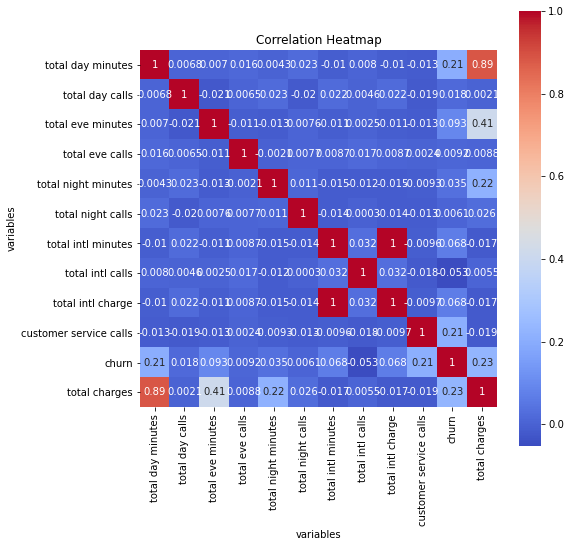

In [26]:
#calculating the new correlation matrix of the data set
correlation_matrix=data.corr()

fig, ax=plt.subplots(figsize=(8,8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
 
plt.title('Correlation Heatmap')
plt.xlabel('variables')
plt.ylabel('variables')

#save the plot
plt.savefig('./Graphs/fixed_heatmap.png', dpi=150)

plt.show()

The column **'Total international minutes'** and **'total international charge'** are Positively Correlated Columns. The charge a customer gets is a result of the minutes used.
***********

Changing the values of the target column into binary values using label encoding method.

In [27]:
#Label Encoding the target column
label_encoder=LabelEncoder()
data['churn']=label_encoder.fit_transform(data['churn'])

********
Converting categorical columns into binary features using one hot encoding method.

In [28]:
#One Hot Encoding
data=pd.get_dummies(data, columns=['international plan', 'voice mail plan'])
data.head()

,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charges,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,265.1,110,197.4,99,244.7,91,10.0,3,2.70,1,0,72.86,1,0,0,1
1,161.6,123,195.5,103,254.4,103,13.7,3,3.70,1,0,55.54,1,0,0,1
2,243.4,114,121.2,110,162.6,104,12.2,5,3.29,0,0,59.00,1,0,1,0
3,299.4,71,61.9,88,196.9,89,6.6,7,1.78,2,0,65.02,0,1,1,0
4,166.7,113,148.3,122,186.9,121,10.1,3,2.73,3,0,49.36,0,1,1,0


In [29]:
#Scaling the data: Scaling/standarizing the variables
#scaler=MinMaxScaler()
#scaled_data=scaler.fit_transform(data)
#data.head()

********
To standarize the values of the data set its necessary to scale the data set into a comparable range. I will use Min-Max normalization method. Using this method, the minimum value of the variable is set to 0 and the maximum value will be set to 1. The values in between are scaled proportionally.

In [30]:
#Scaling the data: Scaling/standardizing the variables
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
data.loc[:, :] = scaled_data

data.head()

,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,total intl charge,customer service calls,churn,total charges,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,0.755701,0.666667,0.542755,0.582353,0.595750,0.408451,0.500,0.15,0.500000,0.111111,0.0,0.728575,1.0,0.0,0.0,1.0
1,0.460661,0.745455,0.537531,0.605882,0.621840,0.492958,0.685,0.15,0.685185,0.111111,0.0,0.489942,1.0,0.0,0.0,1.0
2,0.693843,0.690909,0.333242,0.647059,0.374933,0.500000,0.610,0.25,0.609259,0.000000,0.0,0.537614,1.0,0.0,1.0,0.0
3,0.853478,0.430303,0.170195,0.517647,0.467187,0.394366,0.330,0.35,0.329630,0.222222,0.0,0.620557,0.0,1.0,1.0,0.0
4,0.475200,0.684848,0.407754,0.717647,0.440290,0.619718,0.505,0.15,0.505556,0.333333,0.0,0.404795,0.0,1.0,1.0,0.0


# 4. Modeling

In order to achieve the targets of this model I will be using two algorithms:
- Logistic Regression
- Decision Tree

Starting the modeling process:

In [31]:
#Defining x and y
X=data.drop('churn', axis=1)
y=data['churn']

In [32]:
#splitting the data into train and test sets
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
#checking the value count of the training set
y_train.value_counts()

0.0    2141
1.0     358
Name: churn, dtype: int64

********
Applying SMOTE for the unbalanced target column to deal with class imbalance.

SMOTE (Synthetic Minority Oversampling Technique) is an oversampling method where synthetic samples are generated by minority class. This method helps avoid overfitting problems. Its goal is to balance class distribution by randomly increasing minority class examples by replicating them.

In [34]:
#import necessary library
from imblearn.over_sampling import SMOTE

#instantiate
smote= SMOTE(sampling_strategy=1)
X_resampled, y_resampled=smote.fit_resample(X_train, y_train)

#Check resampled training set
print(y_resampled.value_counts())

1.0    2141
0.0    2141
Name: churn, dtype: int64


Logistic Regression algorithm is used for binary classification, where the dependent is binary. The goal of this algorithm is to estimate the probability of an instance belonging to a specific class based on the values of the independent variables.

In [35]:
#instantiate logistic regression
logreg=LogisticRegression(fit_intercept=False, C=1e16, solver='liblinear')

In [36]:
#fit the model on the training data
logreg.fit(X_resampled, y_resampled)

LogisticRegression(C=1e+16, fit_intercept=False, solver='liblinear')

In [37]:
#predict
y_pred_log=logreg.predict(X_test)

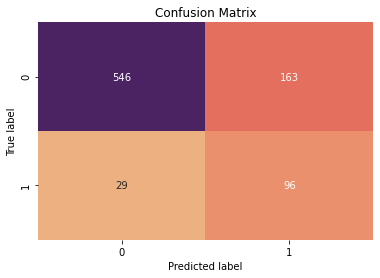

In [38]:
#import necessary library for confusion matrix
from sklearn.metrics import confusion_matrix

#create the confusion matrix
cm = confusion_matrix(y_test, y_pred_log)

#custom color map
custom_cmap = sns.color_palette("flare", as_cmap=True)

#plot the confusion matrix as a heatmap
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap=custom_cmap, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')

#save the plot
plt.savefig('./Graphs/confmatrix_logistic.png', dpi=150)

plt.show()

In [39]:
#classification report
print(classification_report(y_test, y_pred_log))

              precision    recall  f1-score   support

         0.0       0.95      0.77      0.85       709
         1.0       0.37      0.77      0.50       125

    accuracy                           0.77       834
   macro avg       0.66      0.77      0.68       834
weighted avg       0.86      0.77      0.80       834



The logistic regression modell has a macro average score of 0.77, which means that the model can identify 77% of the actual positive instances correctly.

The confusion matrix graph shows that the model has a high number of true positives and true negatives than false positives and false negatives.

The model is making correct predictions more often than incorrect ones and is not overfitting.

### Decision Tree Classifier

Decision Tree Classifier algorithm is a supervised machine learning algorithm that can be used to classify data. Decision trees work by splitting the data into smaller and smaller subsets until each subset contains only data of a single class. The decision tree then predicts the class of a new data point by following the path down the tree that corresponds to the values of its features.

In [40]:
#import necessary library
from sklearn.tree import DecisionTreeClassifier

#instantiate Decision Tree Classifier
dt_clf=DecisionTreeClassifier(random_state=123)

In [41]:
#fit on the data
dt_clf.fit(X_resampled, y_resampled)

#predict 
y_pred_dt=dt_clf.predict(X_test)

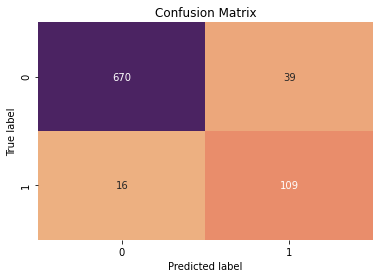

In [42]:
#confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

#custom color map
custom_cmap_dt = sns.color_palette("flare", as_cmap=True)

#plot the confusion matrix as a heatmap
plt.figure()
sns.heatmap(cm_dt, annot=True, fmt='d', cmap=custom_cmap_dt, cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
#save the plot
plt.savefig('./Graphs/confmatrix_DecisionTree.png', dpi=150)
plt.show()

In [43]:
# classification report
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96       709
         1.0       0.74      0.87      0.80       125

    accuracy                           0.93       834
   macro avg       0.86      0.91      0.88       834
weighted avg       0.94      0.93      0.94       834



The decision tree model has a macro average recall score of 0.91, which means it can identify around 91% of the actual positive instances correctly.

The confusion matrix for this algorithm has a higher number of true positives and true negatives than false positives and false negatives.

The model is making more correct predictions than incorrect ones and it is not overfitting.

# 5. Evaluation

In this phase, we'll evaluate models based on recall score and ROC_AUC. 

In [44]:
np.random.seed(123)

classifiers = [LogisticRegression(),
               DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    result_table = result_table.append({'classifier': cls.__class__.__name__,
                                        'recall': recall}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)
result_table

,recall,classifier
classifiers,,
NaN,0.784,LogisticRegression
NaN,0.872,DecisionTreeClassifier


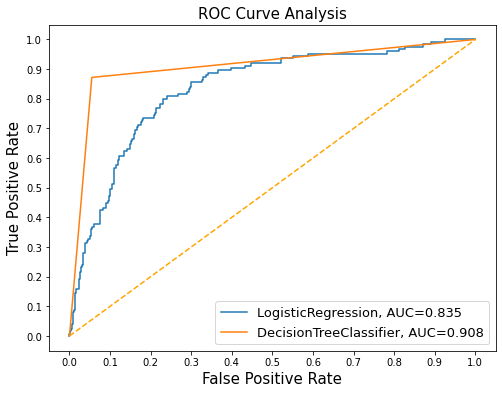

In [45]:
np.random.seed(123)
classifiers = [LogisticRegression(),
               DecisionTreeClassifier()]


# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_resampled, y_resampled)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

#save the plot
plt.savefig('./Graphs/ROC_analysis.png', dpi=150)

plt.show()

The ROC curve analysis shows that out of the two algorithms evaluated, the Decision Tree Classifier algorithm has the best performance. The Decision Tree Classifier has the highest AUC score of 0.912.

A higher AUC score indicates that the classifier is better at distinguishing between positive and negative instances.

# 6. Conclusions

The recall score of the Decision Tree Classifier Algorithm is 91%, which it indicates is a good prediction model.

## Recommendations

- Reduce the number of customer service calls a customer gets. Providing our customer service representatives the right training to ensure effective resolution of customer issues that will lead to higher customer satisfaction and reducing churn.
- Consider adjusted phone plans with discounted packages to address the higher charges associated with customers terminating their contracts.
- Promoting the benefits and convenience of the voice mail services to increase retention of customer with this service. Customers could be offered additional discounts to encourage them to retain their contracts and to sign up new customers.